In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from google.cloud import bigquery
from config import GOOGLE_CREDENTIALS, PROJECT_ID, DATASET_ID
from extract import extract, read_data, check_and_handle_missing_data
from transform import transform, create_datetime_dim, create_passenger_count_dim, create_trip_distance_dim, create_rate_code_dim, create_location_dims, create_payment_type_dim, create_fact_table
from load import load, create_dataset, upload_to_bigquery, create_analysis_report, export_report

# Thiết lập biến môi trường Google Cloud
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = GOOGLE_CREDENTIALS

# Khởi tạo client BigQuery
client = bigquery.Client()

# Đặt tùy chọn hiển thị cho pandas
pd.set_option('display.max_columns', None)

In [30]:
# Đọc dữ liệu
df_raw = read_data()
print("Dữ liệu gốc (5 dòng đầu):")
display(df_raw.head())

Dữ liệu gốc (5 dòng đầu):


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [31]:
# Xử lý NaN
df_clean = check_and_handle_missing_data(df_raw)
print("\nDữ liệu sau khi xử lý NaN (5 dòng đầu):")
display(df_clean.head())

Số lượng giá trị NaN theo cột:
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64
Số lượng giá trị NaN sau xử lý:
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_am

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [32]:
# Chạy toàn bộ bước Extract
df = extract()
print("\nKết quả bước Extract (5 dòng đầu):")
display(df.head())
print(f"Số lượng bản ghi: {len(df)}")

Số lượng giá trị NaN theo cột:
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64
Số lượng giá trị NaN sau xử lý:
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_am

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


Số lượng bản ghi: 100000


In [33]:
# Tạo bảng datetime_dim
datetime_dim = create_datetime_dim(df)
print("Bảng datetime_dim (5 dòng đầu):")
display(datetime_dim.head())

Bảng datetime_dim (5 dòng đầu):


,tpep_pickup_datetime,tpep_dropoff_datetime,pick_hour,pick_day,pick_month,pick_year,pick_weekday,drop_hour,drop_day,drop_month,drop_year,drop_weekday,datetime_id
0,2016-03-01 00:00:00,2016-03-01 00:07:55,0,1,3,2016,1,0,1,3,2016,1,0
1,2016-03-01 00:00:00,2016-03-01 00:11:06,0,1,3,2016,1,0,1,3,2016,1,1
2,2016-03-01 00:00:00,2016-03-01 00:31:06,0,1,3,2016,1,0,1,3,2016,1,2
3,2016-03-01 00:00:00,2016-03-01 00:00:00,0,1,3,2016,1,0,1,3,2016,1,3
4,2016-03-01 00:00:01,2016-03-01 00:16:04,0,1,3,2016,1,0,1,3,2016,1,4


In [34]:
# Tạo bảng passenger_count_dim
passenger_count_dim = create_passenger_count_dim(df)
print("\nBảng passenger_count_dim (toàn bộ):")
display(passenger_count_dim)


Bảng passenger_count_dim (toàn bộ):


,passenger_count_id,passenger_count
0,0,1
1,1,2
2,2,3
3,3,5
4,4,6
5,5,4
6,6,0


In [35]:
# Tạo bảng trip_distance_dim
trip_distance_dim = create_trip_distance_dim(df)
print("\nBảng trip_distance_dim (5 dòng đầu):")
display(trip_distance_dim.head())


Bảng trip_distance_dim (5 dòng đầu):


,trip_distance_id,trip_distance
0,0,2.50
1,1,2.90
2,2,19.98
3,3,10.78
4,4,30.43


In [36]:
# Tạo bảng rate_code_dim
rate_code_dim = create_rate_code_dim(df)
print("\nBảng rate_code_dim (toàn bộ):")
display(rate_code_dim)


Bảng rate_code_dim (toàn bộ):


,rate_code_id,RatecodeID,rate_code_name
0,0,1,Standard rate
1,1,3,Newark
2,2,2,JFK
3,3,5,Negotiated fare
4,4,4,Nassau or Westchester
5,5,6,Group ride


In [37]:
# Tạo bảng pickup_location_dim và dropoff_location_dim
pickup_location_dim, dropoff_location_dim = create_location_dims(df)
print("\nBảng pickup_location_dim (5 dòng đầu):")
display(pickup_location_dim.head())
print("\nBảng dropoff_location_dim (5 dòng đầu):")
display(dropoff_location_dim.head())


Bảng pickup_location_dim (5 dòng đầu):


,pickup_location_id,pickup_latitude,pickup_longitude
0,0,40.765152,-73.976746
1,1,40.767925,-73.983482
2,2,40.644810,-73.782021
3,3,40.769814,-73.863419
4,4,40.792183,-73.971741



Bảng dropoff_location_dim (5 dòng đầu):


,dropoff_location_id,dropoff_latitude,dropoff_longitude
0,0,40.746128,-74.004265
1,1,40.733166,-74.005943
2,2,40.675770,-73.974541
3,3,40.757767,-73.969650
4,4,40.695053,-74.177170


In [38]:
# Tạo bảng payment_type_dim
payment_type_dim = create_payment_type_dim(df)
print("\nBảng payment_type_dim (toàn bộ):")
display(payment_type_dim)


Bảng payment_type_dim (toàn bộ):


,payment_type_id,payment_type,payment_type_name
0,0,1,Credit card
1,1,2,Cash
2,2,3,No charge
3,3,4,Dispute


In [39]:
# Tạo bảng fact_table
fact_table = create_fact_table(df, datetime_dim, passenger_count_dim, trip_distance_dim, rate_code_dim, pickup_location_dim, dropoff_location_dim, payment_type_dim)
print("\nBảng fact_table (5 dòng đầu):")
display(fact_table.head())

Bảng fact_table có 140 bản ghi trùng lặp

Bảng fact_table (5 dòng đầu):


,VendorID,datetime_id,passenger_count_id,trip_distance_id,rate_code_id,store_and_fwd_flag,pickup_location_id,dropoff_location_id,payment_type_id,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,0,0,0,0,N,0,0,0,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,1,0,1,0,N,1,1,0,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2,1,2,0,N,2,2,0,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,3,2,3,0,N,3,3,0,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,3,3,4,1,N,4,4,0,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [40]:
# Chạy toàn bộ bước Transform
tables = transform(df)
print("\nKết quả bước Transform:")
for table_name, df_table in tables.items():
    print(f"{table_name}: {len(df_table)} bản ghi")

Bảng fact_table có 140 bản ghi trùng lặp

Kết quả bước Transform:
fact_table: 99930 bản ghi
datetime_dim: 99853 bản ghi
passenger_count_dim: 7 bản ghi
trip_distance_dim: 2303 bản ghi
rate_code_dim: 6 bản ghi
pickup_location_dim: 98055 bản ghi
dropoff_location_dim: 98417 bản ghi
payment_type_dim: 4 bản ghi


# Load

In [41]:
# Tạo dataset
create_dataset(client)
print("Dataset đã được tạo hoặc đã tồn tại.")

Dataset đã được tạo hoặc đã tồn tại.


In [42]:
# Tải một bảng lên BigQuery (ví dụ: fact_table)
upload_to_bigquery({'fact_table': tables['fact_table']})
print("Tải fact_table thành công.")

Tải fact_table thành công.


In [43]:
# Tạo bảng báo cáo
create_analysis_report()
print("Tạo bảng tbl_analysis_report thành công.")

# Xuất báo cáo
export_report()
print("Xuất file tbl_analysis_report.csv thành công.")

Tạo bảng tbl_analysis_report thành công.
Xuất file tbl_analysis_report.csv thành công.


In [44]:
# Chạy toàn bộ bước Load
load(tables)
print("Hoàn tất bước Load.")

Hoàn tất bước Load.


Kết quả truy vấn:


,pick_hour,trip_count,total_revenue
0,0,7074,123402.43
1,1,4144,70977.33
2,2,2599,41164.55
3,3,1858,31733.96
4,4,1925,38245.29
5,5,3694,68070.55
6,6,1904,32473.27
7,7,9541,142443.41
8,8,11705,177157.87
9,9,10703,167390.65


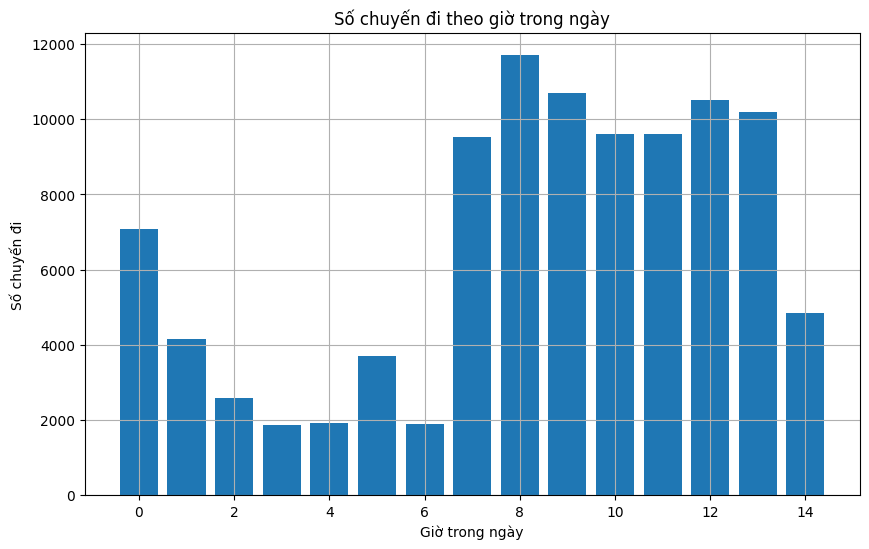

In [45]:
# Truy vấn số chuyến đi theo giờ
query = f"""
SELECT
    dt.pick_hour,
    COUNT(*) AS trip_count,
    SUM(f.total_amount) AS total_revenue
FROM {DATASET_ID}.fact_table f
JOIN {DATASET_ID}.datetime_dim dt ON f.datetime_id = dt.datetime_id
GROUP BY dt.pick_hour
ORDER BY dt.pick_hour
"""
df_analysis = client.query(query).to_dataframe()
print("Kết quả truy vấn:")
display(df_analysis)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.bar(df_analysis['pick_hour'], df_analysis['trip_count'])
plt.title('Số chuyến đi theo giờ trong ngày')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số chuyến đi')
plt.grid(True)
plt.show()

In [46]:
query = f"""
SELECT pt.payment_type_name, COUNT(*) AS trip_count
FROM {DATASET_ID}.fact_table f
JOIN {DATASET_ID}.payment_type_dim pt ON f.payment_type_id = pt.payment_type_id
GROUP BY pt.payment_type_name
"""
df_payment = client.query(query).to_dataframe()
display(df_payment)

,payment_type_name,trip_count
0,Cash,33199
1,Credit card,66548
2,No charge,139
3,Dispute,44


Doanh thu và số chuyến đi theo loại thanh toán:


,payment_type_name,trip_count,total_revenue
0,Credit card,66548,1202467.81
1,Cash,33199,434024.67
2,No charge,139,2039.37
3,Dispute,44,942.28


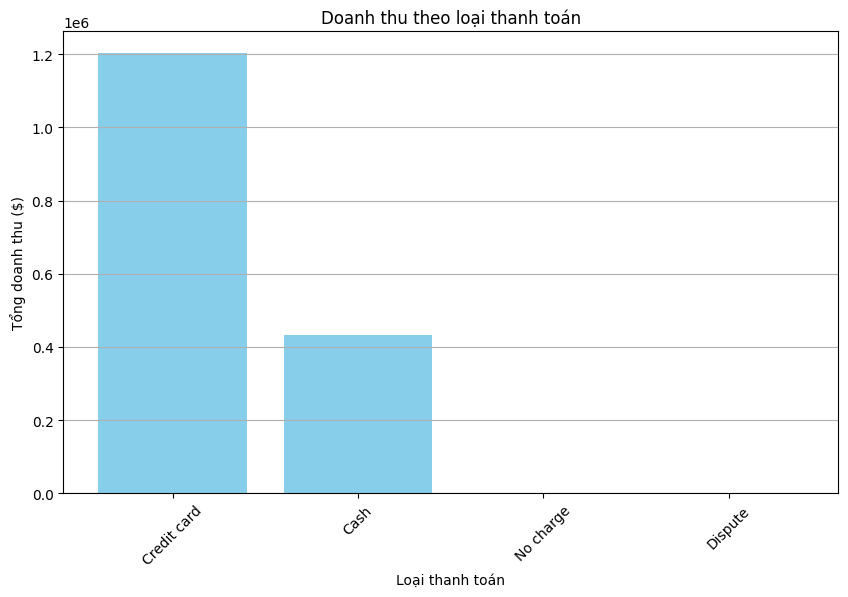

In [47]:
# Truy vấn doanh thu theo loại thanh toán
query_payment = f"""
SELECT
    pt.payment_type_name,
    COUNT(*) AS trip_count,
    SUM(f.total_amount) AS total_revenue
FROM {DATASET_ID}.fact_table f
JOIN {DATASET_ID}.payment_type_dim pt ON f.payment_type_id = pt.payment_type_id
GROUP BY pt.payment_type_name
ORDER BY total_revenue DESC
"""
df_payment = client.query(query_payment).to_dataframe()
print("Doanh thu và số chuyến đi theo loại thanh toán:")
display(df_payment)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.bar(df_payment['payment_type_name'], df_payment['total_revenue'], color='skyblue')
plt.title('Doanh thu theo loại thanh toán')
plt.xlabel('Loại thanh toán')
plt.ylabel('Tổng doanh thu ($)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

Số chuyến đi theo ngày trong tuần:


,pick_weekday,weekday_name,trip_count
0,1,Tuesday,23198
1,3,Thursday,76732


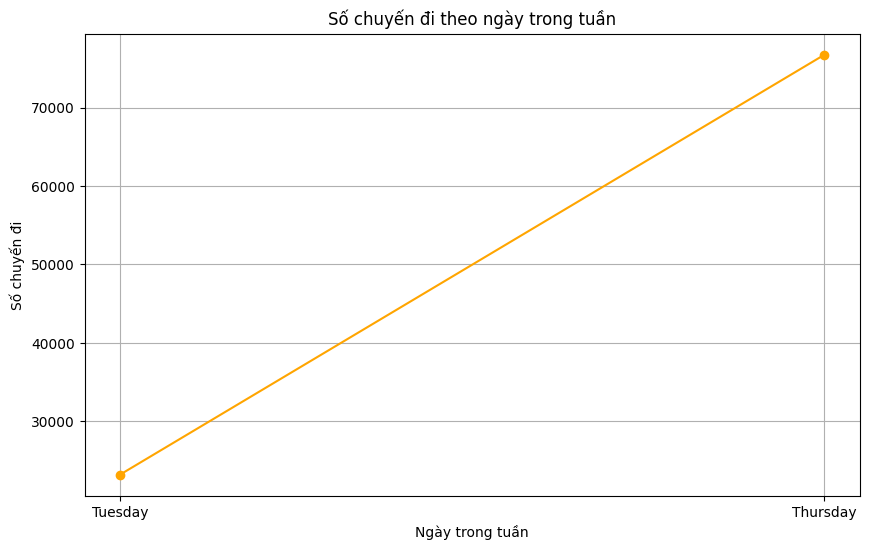

In [48]:
# Truy vấn số chuyến đi theo ngày trong tuần
query_weekday = f"""
SELECT
    dt.pick_weekday,
    CASE dt.pick_weekday
        WHEN 0 THEN 'Monday'
        WHEN 1 THEN 'Tuesday'
        WHEN 2 THEN 'Wednesday'
        WHEN 3 THEN 'Thursday'
        WHEN 4 THEN 'Friday'
        WHEN 5 THEN 'Saturday'
        WHEN 6 THEN 'Sunday'
    END AS weekday_name,
    COUNT(*) AS trip_count
FROM {DATASET_ID}.fact_table f
JOIN {DATASET_ID}.datetime_dim dt ON f.datetime_id = dt.datetime_id
GROUP BY dt.pick_weekday
ORDER BY dt.pick_weekday
"""
df_weekday = client.query(query_weekday).to_dataframe()
print("Số chuyến đi theo ngày trong tuần:")
display(df_weekday)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(df_weekday['weekday_name'], df_weekday['trip_count'], marker='o', color='orange')
plt.title('Số chuyến đi theo ngày trong tuần')
plt.xlabel('Ngày trong tuần')
plt.ylabel('Số chuyến đi')
plt.grid(True)
plt.show()

Khoảng cách trung bình và số chuyến đi theo mã giá vé:


,rate_code_name,avg_trip_distance,trip_count
0,Nassau or Westchester,20.199792,48
1,JFK,17.446343,2207
2,Newark,16.558577,260
3,Negotiated fare,6.130925,281
4,Standard rate,2.655194,97133
5,Group ride,0.100000,1


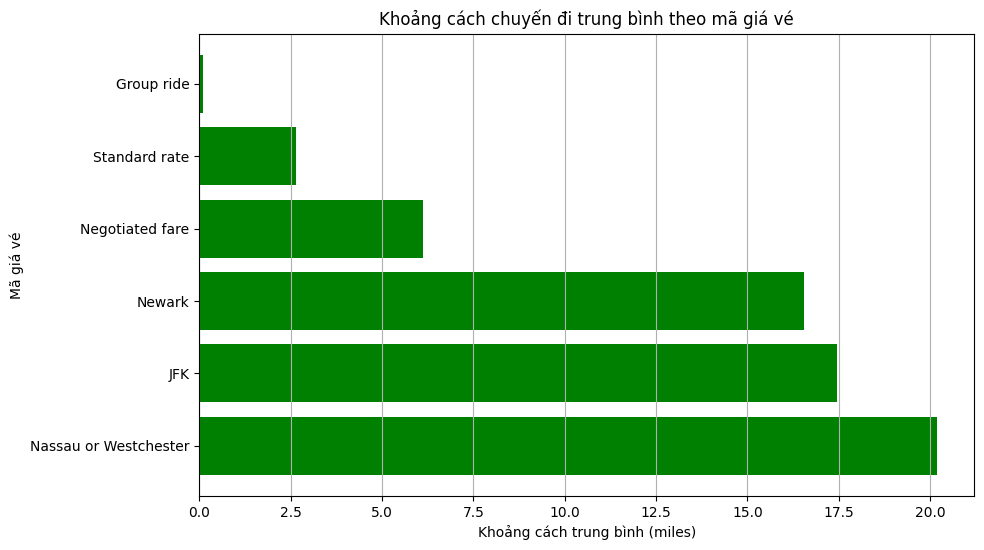

In [49]:
# Truy vấn khoảng cách trung bình theo mã giá vé
query_ratecode = f"""
SELECT
    rc.rate_code_name,
    AVG(td.trip_distance) AS avg_trip_distance,
    COUNT(*) AS trip_count
FROM {DATASET_ID}.fact_table f
JOIN {DATASET_ID}.rate_code_dim rc ON f.rate_code_id = rc.rate_code_id
JOIN {DATASET_ID}.trip_distance_dim td ON f.trip_distance_id = td.trip_distance_id
GROUP BY rc.rate_code_name
ORDER BY avg_trip_distance DESC
"""
df_ratecode = client.query(query_ratecode).to_dataframe()
print("Khoảng cách trung bình và số chuyến đi theo mã giá vé:")
display(df_ratecode)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.barh(df_ratecode['rate_code_name'], df_ratecode['avg_trip_distance'], color='green')
plt.title('Khoảng cách chuyến đi trung bình theo mã giá vé')
plt.xlabel('Khoảng cách trung bình (miles)')
plt.ylabel('Mã giá vé')
plt.grid(True, axis='x')
plt.show()

In [50]:
query_schema = f"""
SELECT column_name, data_type
FROM {DATASET_ID}.INFORMATION_SCHEMA.COLUMNS
WHERE table_name = 'fact_table'
"""
df_schema = client.query(query_schema).to_dataframe()
print("Cấu trúc bảng fact_table:")
display(df_schema)

Cấu trúc bảng fact_table:


,column_name,data_type
0,VendorID,INT64
1,datetime_id,INT64
2,passenger_count_id,INT64
3,trip_distance_id,INT64
4,rate_code_id,INT64
5,store_and_fwd_flag,STRING
6,pickup_location_id,INT64
7,dropoff_location_id,INT64
8,payment_type_id,INT64
9,fare_amount,FLOAT64
